In [9]:
#from __future__ import division
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# openCV basics
### viewing and playing with images

In [2]:
def get_image(path):
    img = cv2.imread(path)
    # img = cv2.cvtColor(img, cv2.cv.CV_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def show_img(img, title = None):
    plt.subplot(111)
    plt.imshow(img, cmap='gray')
    plt.suptitle(title)
    plt.show()
    
def img_diff(img1, img2, threshold = 60):
#     gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    gray1 = cv2.GaussianBlur(gray1, (21, 21), 0)

    gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
    gray2 = cv2.GaussianBlur(gray2, (21, 21), 0)
    
    dif = cv2.absdiff(gray1, gray2)
    dif = cv2.threshold(dif, threshold, 255, cv2.THRESH_BINARY)[1]
    
    show_img(dif)

In [3]:
mossy = get_image('../images/mossydeer.jpg')
nomossy = get_image('../images/nomossy.jpg')
bgr_mossy = cv2.cvtColor(mossy, cv2.COLOR_RGB2BGR)
gray_mossy = cv2.cvtColor(mossy, cv2.COLOR_RGB2GRAY)

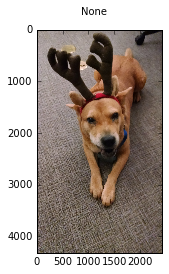

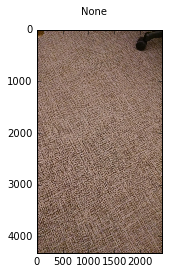

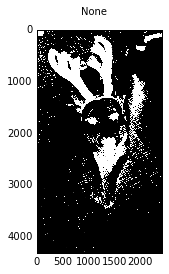

In [4]:
show_img(mossy,)
show_img(nomossy)

# show_img(bgr_mossy)
# show_img(gray_mossy, title = 'gray mossy?', cmap='gray')


img_diff(mossy, nomossy)

# show_img(mossy - nomossy)
# show_img((mossy + nomossy)/2)
# show_img(mossy-((mossy + nomossy)/2))



### Playing with deer images

In [5]:
deer1 = get_image('../data/motion_test/EK000025-2.JPG')
deer2 = get_image('../data/motion_test/EK000026-2.JPG')
deer3 = get_image('../data/motion_test/EK000027-2.JPG')

floor_avg= (deer1+deer2+deer3)//3
avg_deer = (deer1+deer2+deer3)/3
geomean = (deer1*deer2*deer3)**(1/3)

roundeer1 = np.around(deer1, -2)
rd2 = np.around(deer2, -2)
rd3 = np.around(deer3, -2)
ravg = (roundeer1 + rd2 + rd3)/3

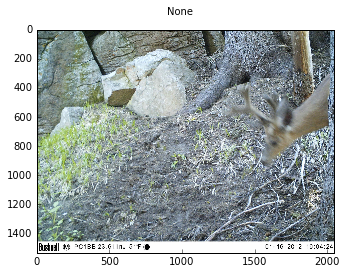

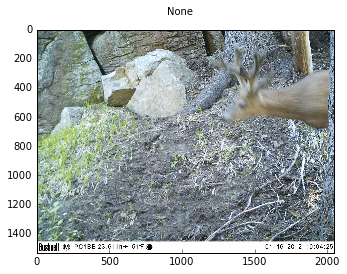

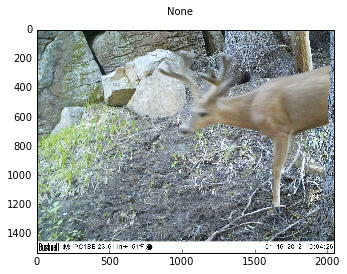

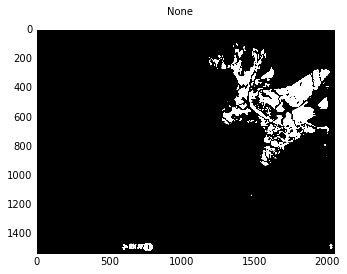

In [29]:
show_img(deer1)
show_img(deer2)
show_img(deer3)

img_diff(deer1, deer2, threshold = 20)

# show_img(avg_deer, title = '3 Image Average')
# show_img(floor_avg, title = '3 Image floor division')

# show_img(256-3*avg_deer)
# show_img(deer3-(256-3*avg_deer))
# show_img(deer3)

# show_img(geomean, title = 'geometric mean')
# show_img(deer1-floor_avg, title = 'deer1')

# show_img(ravg)
# show_img(deer1-ravg)

# Background Subtraction

### Borrowed from:
#### http://www.pyimagesearch.com/2015/05/25/basic-motion-detection-and-tracking-with-python-and-opencv/#

```python

# loop over the frames of the video
while True:
	# grab the current frame and initialize the occupied/unoccupied
	# text
	(grabbed, frame) = camera.read()
	text = "Unoccupied"
 
	# if the frame could not be grabbed, then we have reached the end
	# of the video
	if not grabbed:
		break
 
	# resize the frame, convert it to grayscale, and blur it
	frame = imutils.resize(frame, width=500)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	gray = cv2.GaussianBlur(gray, (21, 21), 0)
 
	# if the first frame is None, initialize it
	if firstFrame is None:
		firstFrame = gray
		continue

	# compute the absolute difference between the current frame and
	# first frame
	frameDelta = cv2.absdiff(firstFrame, gray)
	thresh = cv2.threshold(frameDelta, 25, 255, cv2.THRESH_BINARY)[1]
 
	# dilate the thresholded image to fill in holes, then find contours
	# on thresholded image
	thresh = cv2.dilate(thresh, None, iterations=2)
	(cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
 
	# loop over the contours
	for c in cnts:
		# if the contour is too small, ignore it
		if cv2.contourArea(c) < args["min_area"]:
			continue
 
		# compute the bounding box for the contour, draw it on the frame,
		# and update the text
		(x, y, w, h) = cv2.boundingRect(c)
		cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
		text = "Occupied"
        
```

In [78]:
def event_diff(img_list, thresh=15):
    
    avg_im = np.zeros(img_list[0].shape[:2])
    
    for i, im in enumerate(img_list):
        im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)  # Make Gray
        im = cv2.GaussianBlur(im, (21, 21), 0)     # Blur
        img_list[i] = im
        avg_im += im
    
    avg_im = (avg_im / len(img_list)).astype('uint8')
    show_img(avg_im, title='avg image')
    
    for im in img_list:
        dif = cv2.absdiff(im, avg_im)
        dif = cv2.threshold(dif, thresh, 255, cv2.THRESH_BINARY)[1]
        show_img(dif)

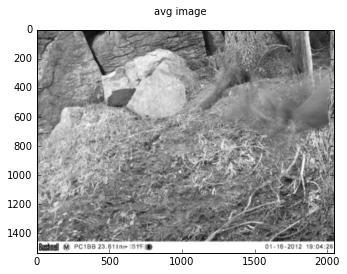

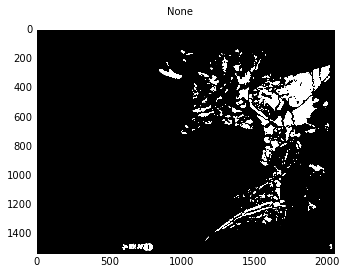

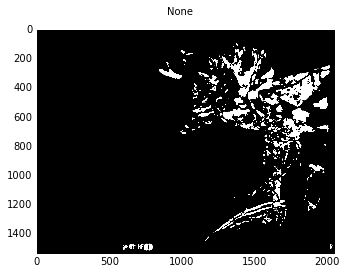

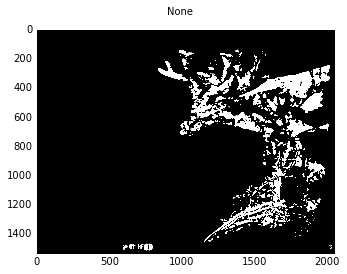

In [76]:
event = [deer1, deer2, deer3]
event_diff(event)

## Larger image groups

In [25]:
data_dir = "../data/second_sample/BC Kettles/Site 1/"
for root, dirs, files in os.walk(data_dir):
#     for name in files:
#         print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

../data/second_sample/BC Kettles/Site 1/April 2015
../data/second_sample/BC Kettles/Site 1/February 2015
../data/second_sample/BC Kettles/Site 1/January 2015
../data/second_sample/BC Kettles/Site 1/March 2015


In [79]:
event_bunch = []
for dr in os.listdir(data_dir)[1:]:
    ev = [get_image(os.path.join(data_dir, dr, im)) for im in os.listdir(os.path.join(data_dir, dr))]
    event_bunch.append(ev)

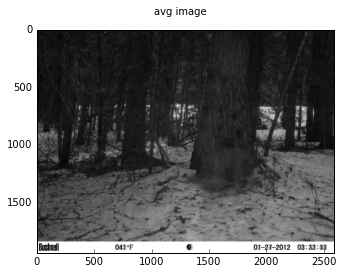

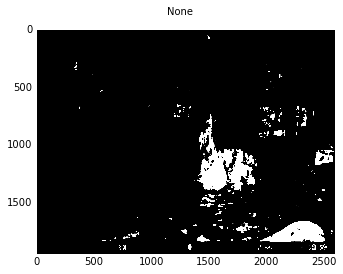

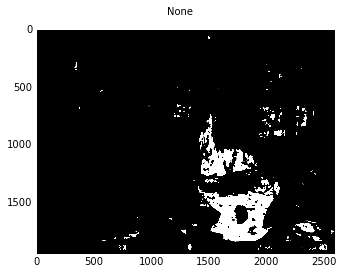

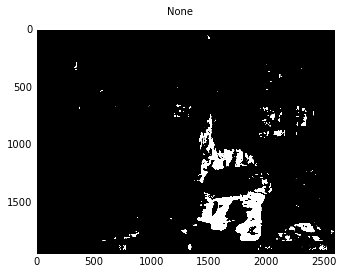

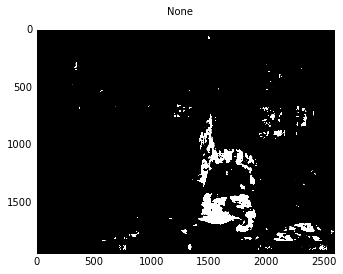

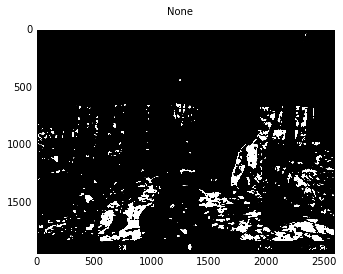

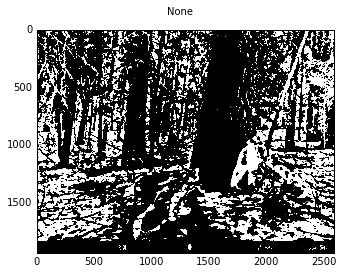

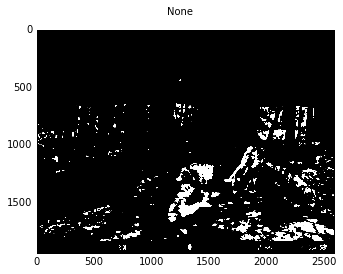

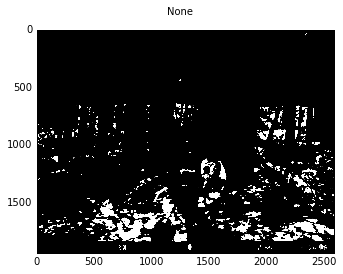

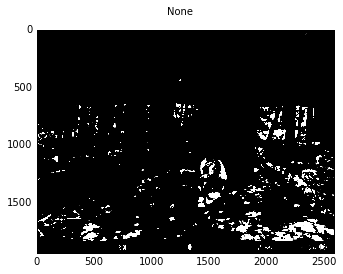

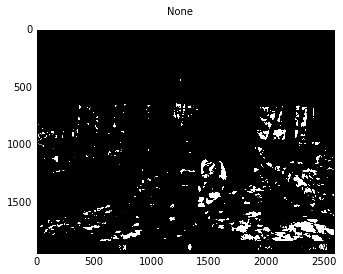

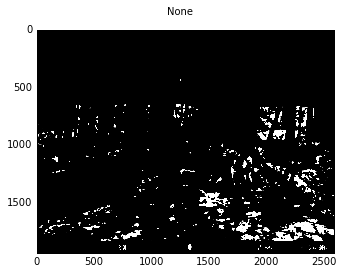

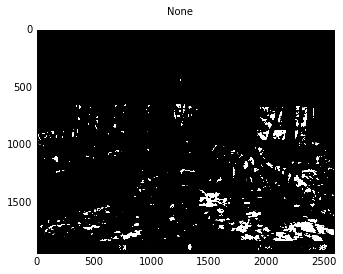

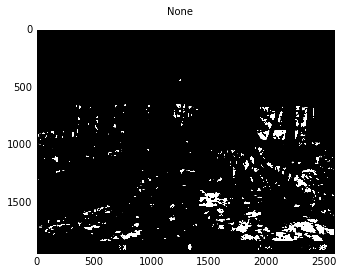

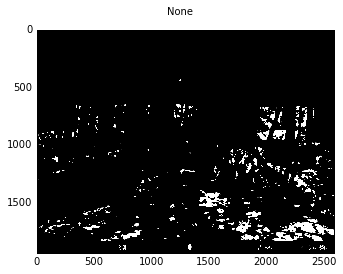

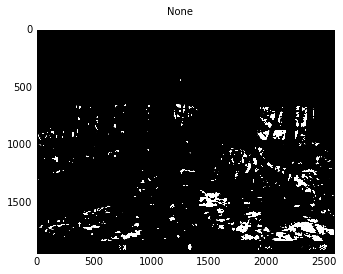

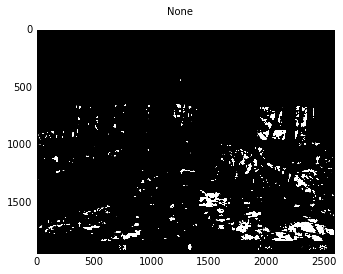

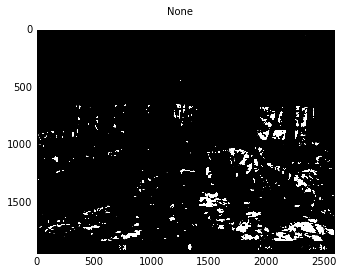

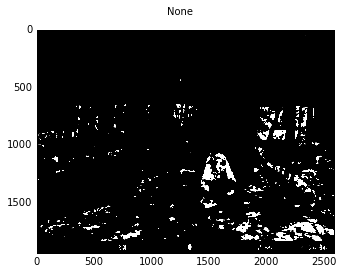

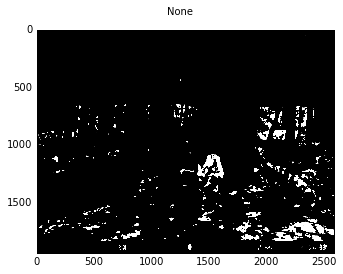

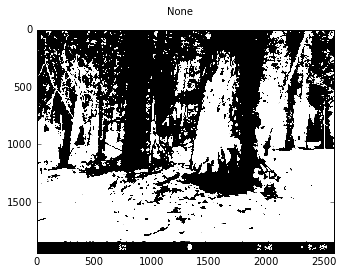

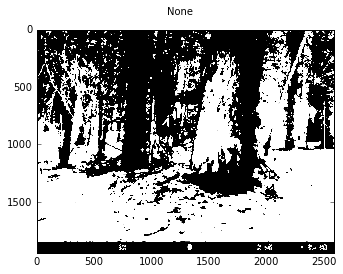

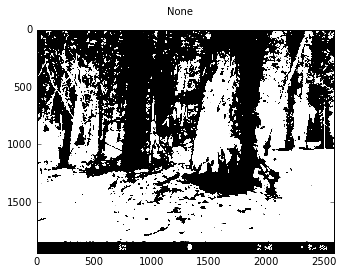

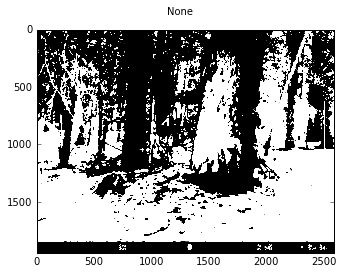

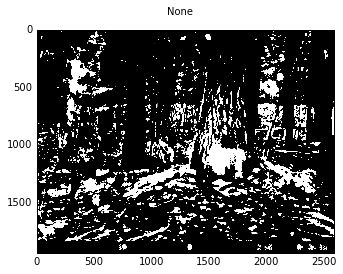

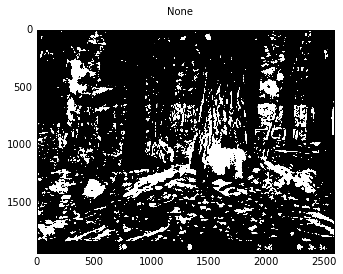

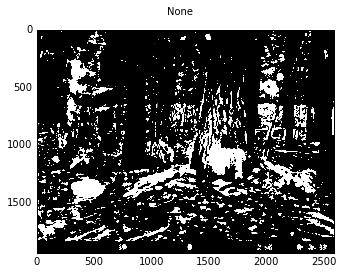

In [81]:
ev = event_bunch[0]
event_diff(ev, thresh=30)